## Setup & Investigate

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
!ls neiss

2017-NEISS-Data-Highlights.pdf
2018-NEISS-Comparability-Table.pdf
2018-NEISS-CPSC-only-Coding-Manual.pdf
NEISS Part 1.ipynb
NEISS Part 2.ipynb
neiss_fmt.txt
neiss2017.tsv
neiss2017excel.xlsx


In [3]:
#  Commnd line code to preview the first few lines of any doc = head
!head -n 5 neiss/neiss2017.tsv

"CPSC_Case_Number"	"Treatment_Date"	"Age"	"Sex"	"Race"	"Other_Race"	"Body_Part"	"Diagnosis"	"Other_Diagnosis"	"Disposition"	"Location"	"Fire_Involvement"	"Product_1"	"Product_2"	"Narrative_1"	"Narrative_2"	"Stratum"	"PSU"	"Weight"
170100733	01/01/2017	21	1	1		75	62		1	1	0	1207	0	21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE	. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION	S	46	77.6641
170100734	01/01/2017	71	1	1		31	53		1	5	0	1807	0	71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION		S	46	77.6641
170100735	01/01/2017	16	1	1		33	51		1	1	0	676	342	16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE	DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM	S	46	77.6641
170100737	01/01/2017	55	2	1		75	62		1	1	0	620	0	55YOF WAS STANDING ON A STEP STOOL AND LOST FOOTING AND FELL. DX CLOSED	HEAD INJURY	S	46	77.6641


In [4]:
#  .tsv is a tab-separated value, so use csv reader but with condition of seperators defined as tabs.
#  Also, this US Gov data and not set to Unicode. IF not Unicode, most US data is set to Latin-1 (ISO/IEC 8859-1).
df = pd.read_csv("neiss/neiss2017.tsv", sep='\t', encoding='latin-1')

C:\Program Files (x86)\Python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(386907, 19)

In [6]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [7]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,1,1.0,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55,2,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,2,1.0,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [8]:
# df.tail()

## Sex
> Decode coded data (converting numbers to meaningful words)
> 
> Remove bad data

In [9]:
df['Sex'].value_counts()

1    208695
2    178203
0         8
8         1
Name: Sex, dtype: int64

In [10]:
#  Replace numbers with names as detailed in the Coding Manual and use a dictionary to organize the changes
df.Sex.replace({
    1: 'Male',
    2: 'Female',
    0: 'Not Recorded'
})

# To make it permanent, we over-write the whole 'Sex' data column
df['Sex'] = df.Sex.replace({
    1: 'Male',
    2: 'Female',
    0: 'Not Recorded'
})

In [11]:
df['Sex'].value_counts()

Male            208695
Female          178203
Not Recorded         8
8                    1
Name: Sex, dtype: int64

In [12]:
# show just the weird row with Sex = 8 and investigate
df[df.Sex == 8]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# That's dirty data.  Lots of missing useful & important data.  This should probably be deleted.

In [14]:
#  Find missing data with isna or isnull()
df[df.Diagnosis.isna()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#  Permanently remove empty rows from the whole data set using dropna or dropnull
df = df.dropna(subset=['Diagnosis'])

In [16]:
#  Double check for missing data / nulls with another isna or isnull()
df[df.Diagnosis.isna()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


In [17]:
#  We check the list again for the problem row Sex = "8" and it's gone.
df['Sex'].value_counts()

Male            208695
Female          178203
Not Recorded         8
Name: Sex, dtype: int64

## Race
> State or restate data as 'missing' at setup  *OR*  use numpy to make the change mid-stream
> 
> Correcting bad labels and grouping with **numpy**

In [18]:
df.Race.value_counts()

1.0    160527
0.0    143677
2.0     55144
3.0     21193
4.0      4714
5.0      1234
6.0       417
Name: Race, dtype: int64

In [19]:
# As we did with Sex, we'll replace the coded numbers with meaningful names as provided by the NEISS Coding Manual
df.Race.replace({
    1: 'White',
    2: 'Black',
    4: 'Asian',
    5: 'American Indian',
    6: 'Pacific Islander',
    3: 'Other',
    0: 'Not Stated'
})

# And make the change permanent with "df['Race'] = "
df['Race'] = df.Race.replace({
    1: 'White',
    2: 'Black',
    4: 'Asian',
    5: 'American Indian',
    6: 'Pacific Islander',
    3: 'Other',
    0: 'Not Stated'
})

In [20]:
df.Race.value_counts()

White               160527
Not Stated          143677
Black                55144
Other                21193
Asian                 4714
American Indian       1234
Pacific Islander       417
Name: Race, dtype: int64

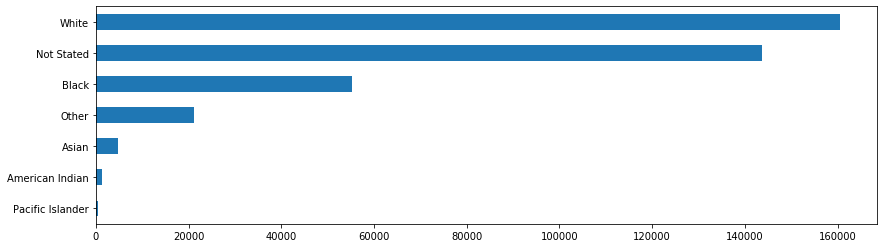

In [21]:
df.Race.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(14,4))

In [22]:
df.Race.value_counts(normalize=True).round(3)

White               0.415
Not Stated          0.371
Black               0.143
Other               0.055
Asian               0.012
American Indian     0.003
Pacific Islander    0.001
Name: Race, dtype: float64

In [23]:
# That's a lot of "Not Stated"

# For this doc '0' was the initial value for missing Race data.
# Maybe '0' is used for some other missing fields?    Maybe its also some descriptive fields?

In [24]:
# There are a number of entires in this dataset that indicate a useless entry:
#     "NaN", "NA", "N/A", "NULL," "UNKNOWN", "UNKN", "Not Recorded", "Not Stated", "0"
df.Other_Race.value_counts()

HISPANIC           17565
UNKNOWN             2515
MULTI-RACIAL        2334
HISP                 816
SOMALI               449
NS                   312
UNKN                 140
NEPALI                51
BIRACIAL              44
MULTIRACIAL           34
MULTI RACIAL          24
ARAB                  17
NON HISPANIC          15
MEXICAN               14
DO NOT KNOW           13
PUERTO RICAN          13
DECLINE               12
`                     11
UNK                   10
SPANISH                8
HISPAINC               8
DECLINED               7
HISPANCI               6
HISAPNIC               6
MANDARIN               6
FULANI                 5
N/S                    4
HISPAINIC              4
JAPANESE               4
TURKISH                4
                   ...  
HISPANIC10             1
NG                     1
URDU                   1
NON-HISPANIC           1
AMISH                  1
HSIPANIC               1
HYSPANIC/LATINO        1
LATIN AMERICAN         1
WHITE/BLACK            1


In [25]:
# Solution 1:  Fix at import
# When the document is imported, the csv-(or whatever)-reader has a "na_values=" variable 
# to declare options as "missing data" and then replace with NaN.
# This is a little dangerous if "0" is used meaningfully anywhere in the dataset.

# df = pd.read_csv("neiss/neiss2017.tsv", sep='\t', encoding='latin-1', na_values=[0, "UNKNOWN", etc.])

In [26]:
# Solution 2:  Fix by column with replace & numpy

# Import numpy as np
df['Other_Race'] = df.Other_Race.replace(['0', 'DECLINED', 'DECLINE', 'UNK', 'UNKN', 'UNKOWN', 'UNKNOWN', 'UNKNOKWN', 'DO NOT KNOW', 'DONOT KNOW', 'NOT STATED', 'N/S', 'NS', 'OTHER', 'OTHER RACE UK', 'P', 'M', '=', '`', '``', '"', '- LAC. TO SCALP', 'HYPOGLYCEMIA'], np.nan)

In [27]:
# Also there are an enormous number of "Hispanic" variations & mispellings:
df[df.Other_Race.str.contains("HISP", na=False)].Other_Race.value_counts()

HISPANIC        17565
HISP              816
NON HISPANIC       15
HISPAINC            8
HISPANCI            6
HISPAINIC           4
NONHISPANIC         2
HISPANIC.           2
HISPANICE           2
HISPAIN             1
HISPOANIC           1
HISPANIC10          1
HISPANC             1
HISPANI             1
`HISPANIC           1
HISPANINC           1
HISPANICX           1
HISPANIC1           1
?HISPANIC           1
NON-HISPANIC        1
1HISPANIC           1
Name: Other_Race, dtype: int64

In [28]:
# This regular expression will pick up only those words that start with "HIS":
#     ^   = Must be the beginning of a line
#     .*  = Combination of any character and any length text that follows
#     Also note the "str".    ".str.replace" replaces part(s) of a cell but ".replace" will replace the entire cell.

df[df.Other_Race.str.contains("^HIS.*", na=False)].Other_Race.value_counts()

HISPANIC      17565
HISP            816
HISPAINC          8
HISPANCI          6
HISAPNIC          6
HISPAINIC         4
HISPANIC.         2
HISPANICE         2
HISPOANIC         1
HISPANIC10        1
HISPANC           1
HIS0PANIC         1
HISPAIN           1
HISSPANIC         1
HIS               1
HISPANINC         1
HISPANICX         1
HISPANIC1         1
HISPANI           1
Name: Other_Race, dtype: int64

In [29]:
# # Still a regular expression but a standard replace, no numpy required.
# df['Other_Race'] = df.Other_Race.str.replace("^HIS.*", "HISPANIC")
# df.Other_Race.value_counts()

In [30]:
# #  Some other clean up work, sloppy and mostly explicit:

# df['Other_Race'] = df.Other_Race.str.replace("PUERTO RICAN", "PUERTORICAN")

# df['Other_Race'] = df.Other_Race.str.replace("MEXICIAN", "MEXICAN")

# df['Other_Race'] = df.Other_Race.str.replace("^MIXED.*", "MULTIRACIAL")

# df['Other_Race'] = df.Other_Race.str.replace("^MULTI.*", "MULTIRACIAL")

# listfix_multi = ["MULTI RACIAL", "MULTI-RACIAL", "TWO OR MORE RAC", "2 MORE RACES"]
# for lfm in listfix_multi:
#     df['Other_Race'] = df.Other_Race.str.replace(lfm, "MULTIRACIAL")

# listfix_nonhisp = ["NON HISPANIC", "NON-HISPANIC", "NON_HISPANIC"]
# for lfn in listfix_nonhisp:
#     df['Other_Race'] = df.Other_Race.str.replace(lfn, "NONHISPANIC")

# listfix_bi = ["BIRCACIAL", "WHITE/BLACK", "BLACK/WHITE"]
# for lfb in listfix_bi:
#     df['Other_Race'] = df.Other_Race.str.replace(lfb, "BIRACIAL")
                 
# listfix_hisp = ["HSP", "HIPANI", "HSPANIC", "HIPANIC", "HIPSANIC", "`HISPANIC", "HSIPANIC", "HISSPANIC", "HISPANICC", "HISPANICANIC", "LATIN AMERICAN"]
# for lfh in listfix_hisp:
#     df['Other_Race'] = df.Other_Race.str.replace(lfh, "HISPANIC")

# df['Other_Race'] = df.Other_Race.str.replace("HYSPANIC/LATINO", "HISPANIC")

# df['Other_Race'] = df.Other_Race.str.replace("`HISPANIC", "HISPANIC")

# #  Don't know how to handle these as the characters break replace:
# # df['Other_Race'] = df.Other_Race.str.replace("HS[PANIC", "HISPANIC")
# # df['Other_Race'] = df.Other_Race.str.replace("?HISPANIC", "HISPANIC")
                
# df.Other_Race.value_counts()

In [31]:
#  Alternative Attempt, a bit more automated:


#  A few explicit fixes: 
df['Other_Race'] = df.Other_Race.str.replace("MIDDLE EASTERN", "MIDDLEEASTERN")
df['Other_Race'] = df.Other_Race.str.replace("PUERTO RICAN", "PUERTORICAN")
df['Other_Race'] = df.Other_Race.str.replace("HAKHA CHIN", "HAKHACHIN")
df['Other_Race'] = df.Other_Race.str.replace("MEXICIAN", "MEXICAN")
df['Other_Race'] = df.Other_Race.str.replace("HAWIAN", "HAWAIIAN")
listfix_bi = ["BIRCACIAL", "WHITE/BLACK", "BLACK/WHITE"]
for lfb in listfix_bi:
    df['Other_Race'] = df.Other_Race.str.replace(lfb, "BIRACIAL")


#  Renaming odd names into safer buckets:
listfix_nonhisp = ["NON HISPANIC", "NON-HISPANIC", "NON_HISPANIC", "NONHISPANIC"]
for lfn in listfix_nonhisp:
    df['Other_Race'] = df.Other_Race.str.replace(lfn, "TEMPNONH")

listfix_hisp = ["HSP", "LATIN AMERICAN"]
for lfh in listfix_hisp:
    df['Other_Race'] = df.Other_Race.str.replace(lfh, "TEMPHI")

df['Other_Race'] = df.Other_Race.str.replace(".*HIS.*", "TEMPHI")
df['Other_Race'] = df.Other_Race.str.replace(".*HIP.*", "TEMPHI")
df['Other_Race'] = df.Other_Race.str.replace(".*PANIC.*", "TEMPHI")

df['Other_Race'] = df.Other_Race.str.replace(".*MIXED.*", "TEMPMR")
df['Other_Race'] = df.Other_Race.str.replace(".*MULTI.*", "TEMPMR")

listfix_multi = ["TWO OR MORE RAC", "2 MORE RACES"]
for lfm in listfix_multi:
    df['Other_Race'] = df.Other_Race.str.replace(lfm, "TEMPMR")

    
#  Renaming safe-names back to standard
df['Other_Race'] = df.Other_Race.str.replace("TEMPMR", "MULTIRACIAL")
df['Other_Race'] = df.Other_Race.str.replace("TEMPNONH", "NONHISPANIC")
df['Other_Race'] = df.Other_Race.str.replace("TEMPHI", "HISPANIC")


df.Other_Race.value_counts()

HISPANIC         18432
MULTIRACIAL       2400
SOMALI             449
NEPALI              51
BIRACIAL            49
NONHISPANIC         18
ARAB                17
MEXICAN             15
PUERTORICAN         13
SPANISH              8
MANDARIN             6
FULANI               5
TURKISH              4
ARABIC               4
JAPANESE             4
LAO                  4
RUSSIAN              3
VIETNAMESE           3
HAKHACHIN            3
UK                   3
AMHARIC              3
HISPANICANIC         2
UKRAINIAN            2
SWAHILI              2
MUSLIM               1
TWI                  1
MIDDLEEASTERN        1
ISRAELI              1
HINDI                1
NG                   1
SOALI                1
ARMENIAN             1
BENGALI              1
URDU                 1
AMISH                1
CAMBODIAN            1
ORIENTAL             1
HAWAIIAN             1
OROMO                1
TIGRINYA             1
Name: Other_Race, dtype: int64

## Age
> Fixing useful but funky data

In [32]:
###### FAILING AT THIS
###### Organize by age 
###### 
df.Age

0          21
1          71
2          16
3          55
4          86
5          58
6          21
7          54
8          21
9          35
10         62
11         22
12         58
13         69
14         74
15         31
16         11
17         55
18         83
19         38
20         59
21         34
22         42
23         96
24         83
25         31
26         79
27          3
28          2
29         82
         ... 
386877     45
386878     48
386879     17
386880     29
386881     34
386882     51
386883     22
386884     11
386885     32
386886     21
386887     29
386888     11
386889      8
386890    212
386891      2
386892    218
386893      5
386894      2
386895      5
386896      3
386897     12
386898     10
386899      4
386900      5
386901      3
386902      2
386903    212
386904    218
386905    202
386906      2
Name: Age, Length: 386906, dtype: object

In [33]:
# Organize by number of injuries per age
df.Age.value_counts()

2      12099
3      10036
13      9140
14      9057
12      8666
15      8520
4       8447
11      8339
10      8042
16      7823
5       7583
9       7489
6       7265
8       7039
17      6908
7       6831
18      5117
19      4466
20      4202
21      4019
27      3673
22      3658
24      3633
25      3586
23      3576
26      3544
28      3508
29      3404
31      3307
32      3255
       ...  
211       66
94        65
101       62
93        62
201       54
102       51
205       45
95        45
204       42
203       36
96        27
103       26
202       25
97        22
104       18
98        17
0         16
105        9
100        9
99         8
101        6
106        5
0          4
102        4
109        2
105        2
103        1
113        1
111        1
108        1
Name: Age, Length: 260, dtype: int64

In [34]:
# Can't do this yet!  There is no longer a value of 'C' in the Ages but it still won't process.  
# df.Age.min()

# It's because Age is listed as an 'object' aka a 'string' in Panda-speak, and that can't be min'ed or max'ed, etc.
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                  object
Race                 object
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [35]:
# Permenantly change the whole Age column into integer 
# But note integers do not allow missing data
df.Age = df.Age.astype(int)

In [36]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                   int32
Sex                  object
Race                 object
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [37]:
df.Age.min()

0

In [38]:
df[df.Age == 2]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
28,170102926,01/01/2017,2,Male,Not Stated,NaN,30.0,53.0,NaN,1.0,1.0,0.0,4076.0,0.0,2YOM CONT SHLDR- FELL BED,NaN,M,14.0,87.0904
101,170105442,01/02/2017,2,Male,Asian,NaN,75.0,62.0,NaN,1.0,1.0,0.0,649.0,0.0,A 2YOM SLIPPED AND FELL WHILE STANDING ON TOIL...,EAD INJURY,V,25.0,16.1828
109,170106085,01/01/2017,2,Female,Black,NaN,85.0,68.0,NaN,5.0,1.0,0.0,1931.0,1915.0,2 YOF INGESTED SOME OF MOMS PILLS - POSSIBLY *...,ATE. DX POISONING,C,31.0,4.7570
114,170106097,01/01/2017,2,Female,Black,NaN,77.0,53.0,NaN,1.0,0.0,0.0,1395.0,0.0,2 YOF PULLING A TOY FROM SISTER AND HIT SELF ...,BRASION,C,31.0,4.7570
119,170106105,01/01/2017,2,Male,Black,NaN,76.0,59.0,NaN,1.0,0.0,0.0,1344.0,0.0,2 YOM HIT IN THE FACE WITH A TOY GUITAR THAT B...,D. DX FACE LACERATION,C,31.0,4.7570
131,170106123,01/01/2017,2,Female,Black,NaN,88.0,59.0,NaN,1.0,0.0,0.0,1893.0,0.0,"2 YOF DANCING AROUND AND FELL, HIT MOUTH ON DO...",NaN,C,31.0,4.7570
150,170106220,01/01/2017,2,Male,Asian,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1807.0,0.0,"2YOM WITH CHI, FELL OUT OF DAD'S ARMS ONTO FLOOR",NaN,V,61.0,16.1828
180,170106726,01/01/2017,2,Female,Other,HISPANIC,76.0,59.0,NaN,1.0,1.0,0.0,4057.0,0.0,2YOF-PT FELL HITTING FOREHEAD ONTO THE TABLE P...,FOREHEAD. DX- 0.5CM FOREHEAD LACERATION.,C,90.0,4.7570
190,170106888,01/02/2017,2,Male,Black,NaN,76.0,59.0,NaN,1.0,0.0,0.0,4057.0,1205.0,2YOM WAS PLAYING BASKETBALL WHEN HE HIT HIS FA...,EYEBROW AND LOWER LIP LACERATIONS,C,8.0,4.7570
243,170107120,01/02/2017,2,Female,White,NaN,75.0,62.0,NaN,1.0,1.0,0.0,4076.0,4057.0,CHI. 2 YOF FELL OFF OF A BED AND INTO A NIGHTS...,NaN,V,95.0,16.1828


In [39]:
df[df.Age == 1]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


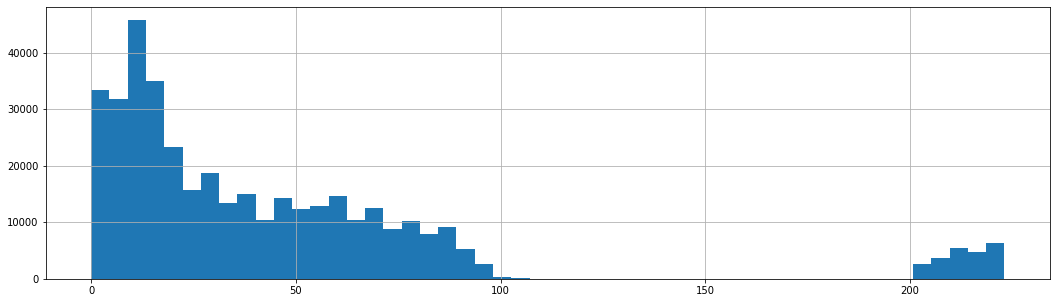

In [40]:
# Looking at the documentation
#     Age  0    =  Not Recorded
#     Ages 200+ =  Babies where the 200 is meaningless but the last two digits count months
df.Age.hist(bins=50, figsize=(18,5))

In [41]:
# Count up all of the times age is greater than 200
# False = 0     True = 1
# So you can do .sum() to collect and add up all of the 1's
(df.Age >= 200).sum()

22818

In [42]:
# If Age '0' are really 'Not Recorded', lets just delete them
# Import numpy as np
df['Age'] = df.Age.replace(['0'], np.nan)

In [43]:
# Solution 1:  remove all babies from the data (anyone with age 200+)
# df = df[df.Age < 200]

In [44]:
# Solution 2:  convert 200+ ages to useful ages 
#     by default, saving decimals like these will make the column floats even if it was already set ints
#     Notee: integers do not allow missing data (due to numpy), but floats do allow it. 

# Can maybe define the equation:
# age_equ = '(df.Age - 200) / 12'

# Can over-write 'Age' column:
# df['Age'] = df.Age.mask(df.Age >= 200, (df.Age - 200) / 12)

# Or make new column:
df['Age_Deci'] = df.Age.mask(df.Age >= 200, (df.Age - 200) / 12)

In [45]:
df[df.Age_Deci < 2]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,Age_Deci
72,170104133,01/01/2017,212,Male,Not Stated,NaN,75.0,62.0,NaN,1.0,1.0,0.0,671.0,0.0,12 MONTH OLD MALE CLIMBED UP ONTO ROCKING CHAR...,TH CLOSED HEAD INJ,V,38.0,16.1828,1.000000
116,170106101,01/01/2017,208,Female,Other,NaN,75.0,53.0,NaN,1.0,1.0,0.0,4076.0,1807.0,8 MOF FELL OFF BED TO FLOOR. DX SCALP CONTUSION,NaN,C,31.0,4.7570,0.666667
125,170106113,01/01/2017,218,Female,White,NaN,83.0,57.0,NaN,1.0,1.0,0.0,1545.0,0.0,18 MOF FELL FROM CRIB. DX FOOT FX,NaN,C,31.0,4.7570,1.500000
126,170106117,01/01/2017,218,Male,White,NaN,32.0,55.0,NaN,1.0,5.0,0.0,1645.0,0.0,18 MOM - PT EATING SPAGHETTI AT A RESTAURANT A...,VE AND HEARD A POP. DX NURSEMAIDS ELBOW,C,31.0,4.7570,1.500000
129,170106120,01/01/2017,204,Female,Other,HISPANIC,75.0,53.0,NaN,1.0,1.0,0.0,4076.0,1807.0,4 MOF FELL OFF BED TO FLOOR. DX SCALP CONTUSION,NaN,C,31.0,4.7570,0.333333
132,170106125,01/01/2017,212,Male,Black,NaN,88.0,60.0,NaN,1.0,0.0,0.0,474.0,0.0,12 MOM - PT WALKING AROUND WITH A *** IN MOUTH...,UMA,C,31.0,4.7570,1.000000
142,170106153,01/02/2017,219,Male,White,NaN,75.0,53.0,NaN,1.0,1.0,0.0,604.0,0.0,19 MONTH OLD MALE FELL AND HIT HEAD ON DRESSSE...,NaN,S,72.0,77.6641,1.583333
184,170106738,01/01/2017,210,Male,White,NaN,88.0,59.0,NaN,1.0,1.0,0.0,679.0,0.0,10MOM-PT FELL FROM THE COUCH @ HOME HITTING HE...,COUCH. INJURY TO LIP. DX- UPPER INNER LIP LACE...,C,90.0,4.7570,0.833333
185,170106880,01/02/2017,208,Male,Other,HISPANIC,75.0,52.0,NaN,1.0,0.0,0.0,1807.0,0.0,8MOM PULLED HIMSELF UP THEN FELL BACKWARDS HIT...,"FLOOR, THEN HE BEGAN VOMITING; CONCUSSION",C,8.0,4.7570,0.666667
187,170106883,01/02/2017,214,Male,Black,NaN,75.0,59.0,NaN,1.0,0.0,0.0,4056.0,0.0,14MOM FELL AND HIT THE BACK OF HIS HEAD ON THE...,"ENTERTAINMENT CENTER; SCALP LACERATION, MINOR ...",C,8.0,4.7570,1.166667


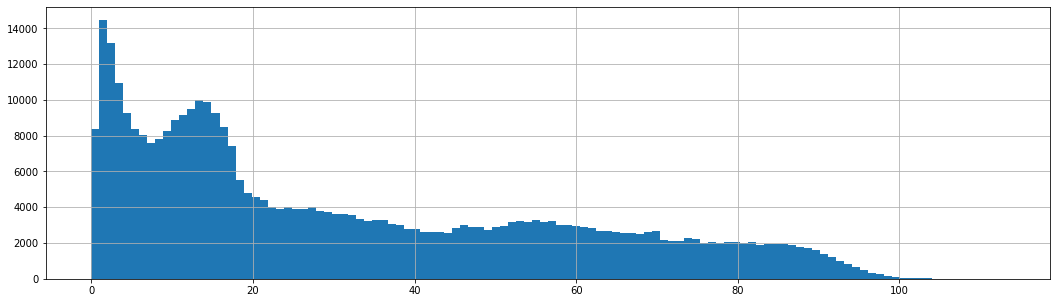

In [46]:
df.Age_Deci.hist(bins=114, figsize=(18,5))

In [47]:
df.groupby('Sex').Age_Deci.median()

Sex
Female          29.0
Male            19.0
Not Recorded     8.5
Name: Age_Deci, dtype: float64

Sex
Female          AxesSubplot(0.125,0.125;0.775x0.755)
Male            AxesSubplot(0.125,0.125;0.775x0.755)
Not Recorded    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age_Deci, dtype: object

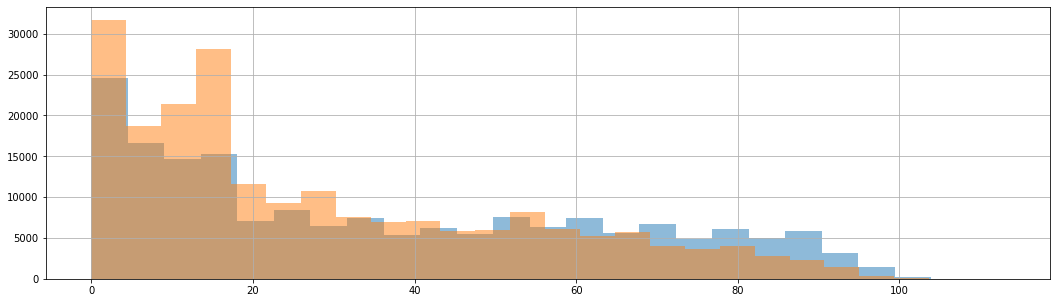

In [48]:
df.groupby('Sex').Age_Deci.hist(alpha=0.5, bins=25, figsize=(18,5))

## Saving

In [49]:
# Save the file to a newFile 
# but to exclude the index numbers you need the index=Flase flag
df.to_csv("neiss/neiss-2017-cleaned.csv", index=False)


# This might require installing openpyxl the package
# df.to_excel("cleaned.csv")  openpyxl

In [52]:
pd.read_csv("neiss/neiss-2017-cleaned.csv").head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,Age_Deci
0,170100733,01/01/2017,21,Male,White,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641,21.0
1,170100734,01/01/2017,71,Male,White,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641,71.0
2,170100735,01/01/2017,16,Male,White,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641,16.0
3,170100737,01/01/2017,55,Female,White,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641,55.0
4,170100740,01/01/2017,86,Female,White,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641,86.0
